In [1]:
import joblib

load_model = joblib.load('model.pk1')
load_model

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [2]:
from google.cloud import bigquery
import pandas as pd

# BigQuery 클라이언트 초기화
client = bigquery.Client(project='jnu-idv-21')

# 쿼리 작성
query = """
SELECT *
FROM `0808.baby_food_tbl2`
"""

# 쿼리 실행 및 결과를 Pandas DataFrame으로 변환
df = client.query(query).to_dataframe()
df

,food_name,ingredient_name,ingredient_index,ingredient_gram,calorie,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,찹쌀미음,"[쌀, 찹쌀, 백미]","[0, 18, 19]","[-1, -1, 23]",86.000000,18.700001,1.7,0.1,0.1,0.900000,34.700001,0.5,0.700000,43.900002,0.000000,0.0,0.0,0.4,0.0
1,닭가슴살고구마죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 닭고기, 가슴살, 날것, 고구마...","[0, 1, 2, 3, 4, 5, 27, 62, 28, 8, 7]","[-1, -1, -1, -1, -1, 20, -1, -1, 20, -1, 20]",117.000000,21.400000,6.2,0.4,0.7,9.800000,63.400002,0.5,16.400000,157.199997,4.800000,0.0,0.0,2.7,5.2
2,닭가슴살당근죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 닭고기, 가슴살, 날것, 당근,...","[0, 1, 2, 3, 4, 5, 27, 62, 28, 47, 7]","[-1, -1, -1, -1, -1, 20, -1, -1, 20, -1, 20]",98.199997,16.900000,6.1,0.4,0.8,12.600000,60.000000,0.5,19.200001,143.800003,252.399994,0.0,0.0,2.7,1.4
3,닭가슴살청경채죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 닭고기, 가슴살, 날것, 청경채...","[0, 1, 2, 3, 4, 5, 27, 62, 28, 39]","[-1, -1, -1, -1, -1, 20, -1, -1, 20, 15]",93.500000,15.700000,6.1,0.4,0.7,18.500000,58.299999,0.5,15.600000,105.400002,52.799999,0.0,0.0,2.6,7.4
4,찹쌀컬리플라워당근죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 쌀, 찹쌀, 백미, 컬리플라워,...","[0, 1, 2, 3, 4, 5, 0, 18, 19, 67, 47, 7]","[-1, -1, -1, -1, -1, 20, -1, -1, 5, 10, -1, 10]",94.199997,20.700001,2.0,0.1,0.7,9.000000,29.000000,0.5,6.400000,96.000000,125.699997,0.0,0.0,0.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,닭고기시금치그라탕,"[닭고기, 가슴살, 날것, 시금치, 생것, 노지, 당근, 생것, 양파, 생것, 국내...","[27, 62, 28, 49, 7, 50, 47, 7, 66, 7, 31, 98, ...","[-1, -1, 30, -1, -1, 10, -1, 10, -1, -1, 10, -...",117.599998,4.200000,11.7,6.0,0.8,133.199997,256.600006,0.6,265.100006,223.399994,241.699997,0.1,0.2,3.5,7.9
144,닭죽,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 닭고기, 가슴살, 날것, 분유,...","[0, 1, 2, 3, 4, 5, 27, 62, 28, 63, 64]","[-1, -1, -1, -1, -1, 20, -1, -1, 20, -1, 15]",162.000000,23.700001,8.8,3.2,0.2,97.599998,123.099998,1.4,35.200001,144.300003,87.599998,0.1,0.2,3.1,7.0
145,도미살무른밥,"[쌀, 멥쌀, 논벼, 백미 국내산, 일반형, 일품, 돔, 감성돔, 배추, 생것, 양...","[0, 1, 2, 3, 4, 5, 83, 84, 40, 7, 73, 7, 52, 53]","[-1, -1, -1, -1, -1, 30, -1, 30, -1, 10, -1, 1...",155.000000,27.500000,9.2,0.7,3.3,89.000000,128.800003,1.4,338.700012,982.599976,15.600000,0.1,0.2,2.2,5.2
146,달걀콩닭고기수프,"[계란, 전란, 생것, 닭고기, 가슴살, 날것, 당근, 생것, 완두콩, 생것, 옥수...","[41, 61, 7, 27, 62, 28, 47, 7, 17, 7, 15, 16, ...","[-1, -1, 20, -1, -1, 20, -1, 10, -1, 10, -1, -...",129.899994,11.200000,10.5,4.6,1.5,84.300003,145.100006,1.6,55.900002,228.100006,221.600006,0.2,0.2,7.5,5.7


In [3]:
# 빈 데이터프레임 생성
new_df = pd.DataFrame()

# 원본 데이터프레임 순회
for index, row in df.iterrows():
    food_name = row['food_name']
    ingredient_names = row['ingredient_name']
    ingredient_grams = row['ingredient_gram']
    
    # 재료 이름과 그램을 딕셔너리 형태로 매핑
    ingredient_dict = dict(zip(ingredient_names, ingredient_grams))
    
    # 새로운 행 추가
    new_row = {'food_name': food_name, **ingredient_dict}
    new_df = new_df.append(new_row, ignore_index=True)

new_data = pd.DataFrame(new_df)
new_data

/var/tmp/ipykernel_895859/1500632064.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_895859/1500632064.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_895859/1500632064.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_895859/1500632064.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
/var/tmp/ipykernel_895859/1500632064.py:15: FutureWarning: The frame.append meth

,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,닭고기,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,찹쌀미음,-1.0,-1.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,닭가슴살고구마죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,닭가슴살당근죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,닭가슴살청경채죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,찹쌀컬리플라워당근죽,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,닭고기시금치그라탕,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,닭죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,도미살무른밥,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,30.0
146,달걀콩닭고기수프,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
category_ = {
    "초기 이유식" : [
        "감자미음",
        "고구마미음",
        "브로콜리미음",
        "사과미음",
        "쌀미음",
        "애호박미음",
        "옥수수미음",
        "완두콩미음",
        "찹쌀미음",
        "흑미미음",
        "단호박미음",
        "기장미음",
        "닭고기미음",
        "바나나미음",
        "배미음",
        "쇠고기미음",
        "수박미음",
        "수수미음",
        "양배추미음",
        "오이미음",
        "청경채미음"
    ],
    "중기 이유식" : [
        "쇠고기브로콜리죽",
        "감자야채달걀노른자찜",
        "감자죽",
        "고구마사과조림",
        "단호박죽",
        "달걀노른자고구마죽",
        "달걀노른자비트죽",
        "당근두부죽",
        "대구살시금치죽",
        "두부달걀노른자찜",
        "두부참깨가루죽",
        "배추연두부죽",
        "브로콜리죽",
        "달걀콩닭고기수프",
        "닭가슴살고구마죽",
        "닭가슴살당근죽",
        "닭가슴살버섯죽",
        "닭가슴살청경채죽",
        "닭고기브로콜리수프",
        "닭죽",
        "두부닭죽",
        "양배추죽",
        "찹쌀컬리플라워당근죽",
        "쇠고기두부죽",
        "쇠고기아욱죽",
        "쇠고기죽",
        "쌀죽",
        "애호박쇠고기죽",
        "얼갈이버섯죽",
        "오이쇠고기감자죽",
        "오이죽",
        "오이치즈죽",
        "조기양송이죽",
        "찹쌀검정콩죽",
        "청경채죽",
        "표고버섯달걀노른자죽",
        "현미당근묽은진죽",
        "현미묽은죽",
        "현미애호박죽",
        "흑미무죽",
        "단호박참깨버무리",
        "브로콜리양송이죽",
        "닭고기옥수수스프",
        "달걀노른자묽은죽",
        "당근죽",
        "두부죽",
        "애호박죽",
        "시금치죽",
        "명태죽",
        "대구살죽",
        "쇠고기청경채죽",
        "달걀콩죽",
        "브로콜리당근죽",
        "호박죽",
        "달걀노른자죽",
    ],
    
    "후기 이유식":[
        "가지나물들깨진밥",
        "가지닭살무른밥",
        "감자애호박무른밥",
        "검은콩닭죽",
        "고구마두부죽",
        "고구마야채무른밥",
        "고구마찹쌀진밥",
        "김노른자무른밥",
        "노른자영양무른밥",
        "단호박고구마진밥",
        "단호박찹쌀무른밥",
        "닭가슴살사과무른밥",
        "닭고기완자핑거푸드",
        "닭타락죽",
        "도미살무른밥",
        "들깨야채무른밥",
        "들깨죽",
        "멜론감자수프",
        "명태배당근진밥",
        "미역무른밥",
        "브로콜리닭무른밥",
        "비트사과치즈진밥",
        "쇠고기미역무른밥",
        "쇠고기양송이무른밥",
        "쇠고기연근무른밥",
        "쇠고기완자핑거푸드",
        "쇠고기파래진밥",
        "애호박완두콩무른밥",
        "연두부아욱진밥",
        "연두부파무른밥",
        "옥수수청경채무른밥",
        "조기배추진밥",
        "치즈야채무른밥",
        "콩나물표고버섯무른밥",
        "파프리카감자진밥",
        "흑미두부무른밥",
        "흑미버섯무른밥",
        "명태옥수수달걀진밥",
        "감자수제비",
        "닭고기시금치그라탕",
        "무숙주비빔밥",
        "밥경단",
        "잔치국수",
        "카레라이스",
        "우엉오므라이스",
        "버섯덮밥",
        "아기약밥",
        "쇠고기난자완스",
        "당근퓨레",
        "양송이버섯감자수프",
        "표고버섯무른밥",
        "콩나물무른밥",
        "명태옥수수진밥",
        "비트치즈진밥",
        "명태배진밥",
        "사과치즈진밥",
        "명태당근진밥",
        "쇠고기버섯진밥",
    ],
    "이유기 간식" : [
        "닭가슴살요구르트샐러드",
        "오렌지퓨레",
        "과일요구르트범벅",
        "감자바나나요구르트으깸",
        "고구마경단",
        "감자완자핑거푸드",
        "단호박메시",
        "바나나퓨레",
        "배퓨레",
        "사과배푸딩",
        "사과퓨레",
        "아가용치즈",
        "고구마사과메시",
        "감자사과메시"
    ]
}

new_data['category'] = ''
for category, foods in category_.items():
    new_data.loc[new_data['food_name'].isin(foods),'category'] = category
    new_data = new_data[['category'] + [col for col in new_data.columns if col != 'category']]
new_data

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,초기 이유식,찹쌀미음,-1.0,-1.0,23.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,중기 이유식,닭가슴살고구마죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,중기 이유식,닭가슴살당근죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,중기 이유식,닭가슴살청경채죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,중기 이유식,찹쌀컬리플라워당근죽,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,후기 이유식,닭고기시금치그라탕,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,중기 이유식,닭죽,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,후기 이유식,도미살무른밥,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,30.0
146,중기 이유식,달걀콩닭고기수프,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = new_data.copy()
data = data.fillna(0)
data = data.replace(-1.0, 5)
data

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,초기 이유식,찹쌀미음,5.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,중기 이유식,닭가슴살고구마죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,중기 이유식,닭가슴살당근죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,중기 이유식,닭가슴살청경채죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,중기 이유식,찹쌀컬리플라워당근죽,5.0,5.0,5.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,후기 이유식,닭고기시금치그라탕,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,중기 이유식,닭죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,후기 이유식,도미살무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0
146,중기 이유식,달걀콩닭고기수프,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data1 = data.iloc[:,1:]
data1

,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,닭고기,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,찹쌀미음,5.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,닭가슴살고구마죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,닭가슴살당근죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,닭가슴살청경채죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,찹쌀컬리플라워당근죽,5.0,5.0,5.0,5.0,5.0,5.0,5.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,닭고기시금치그라탕,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,닭죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,도미살무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0
146,달걀콩닭고기수프,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
predictions = load_model.predict(predict_data)

In [15]:
label = predictions
label_df = pd.DataFrame(label,columns=['category'])
label_df

,category
0,후기 이유식
1,중기 이유식
2,중기 이유식
3,중기 이유식
4,중기 이유식
...,...
143,후기 이유식
144,중기 이유식
145,후기 이유식
146,이유기 간식


In [23]:
result = pd.concat([label_df,data1],axis=1)
result

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,후기 이유식,찹쌀미음,5.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,중기 이유식,닭가슴살고구마죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,중기 이유식,닭가슴살당근죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,중기 이유식,닭가슴살청경채죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,중기 이유식,찹쌀컬리플라워당근죽,5.0,5.0,5.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,후기 이유식,닭고기시금치그라탕,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,중기 이유식,닭죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,후기 이유식,도미살무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0
146,이유기 간식,달걀콩닭고기수프,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 초기 이유식

In [31]:
early = result[result['category'] == '초기 이유식']
early

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
15,초기 이유식,기장미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,초기 이유식,청경채미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,초기 이유식,감자미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,초기 이유식,고구마미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,초기 이유식,사과미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,초기 이유식,애호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,초기 이유식,흑미미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,초기 이유식,단호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,초기 이유식,닭고기미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,초기 이유식,바나나미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
early_data = pd.merge(early, df, on='food_name', how='inner')
early_data

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C
0,초기 이유식,기장미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,2.0,19.000000,0.3,0.4,19.799999,0.000000,0.0,0.0,0.3,0.0
1,초기 이유식,청경채미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,15.2,13.700000,0.3,2.5,46.299999,51.799999,0.0,0.0,0.3,7.2
2,초기 이유식,감자미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,2.0,11.800000,0.2,0.5,49.799999,0.000000,0.0,0.0,0.3,2.1
3,초기 이유식,고구마미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,3.8,12.100000,0.2,1.7,53.099998,1.900000,0.0,0.0,0.2,2.5
4,초기 이유식,사과미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,2.0,8.800000,0.2,0.5,21.700001,0.300000,0.0,0.0,0.2,0.4
5,초기 이유식,애호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,4.5,13.400000,0.2,0.5,55.000000,4.100000,0.0,0.0,0.2,5.2
6,초기 이유식,흑미미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,2.2,19.900000,0.2,0.3,16.000000,0.000000,0.0,0.0,0.4,0.0
7,초기 이유식,단호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,5.0,13.400000,0.2,0.7,54.400002,28.600000,0.0,0.0,0.3,2.8
8,초기 이유식,닭고기미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,2.5,23.600000,0.2,5.9,28.500000,5.500000,0.0,0.0,0.9,0.2
9,초기 이유식,바나나미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,2.1,8.800000,0.2,0.4,43.700001,0.700000,0.0,0.0,0.2,0.8


In [108]:
early_train_data = early_data.copy()
early_train_data = early_train_data.iloc[:,-15:]
early_train_data

,carbohydrate,protein,fat,fiber,calcium,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
0,11.2,1.2,0.1,0.2,2.0,19.000000,0.3,0.4,19.799999,0.000000,0.0,0.0,0.3,0.0,0
1,9.6,1.0,0.1,0.6,15.2,13.700000,0.3,2.5,46.299999,51.799999,0.0,0.0,0.3,7.2,1
2,8.8,0.9,0.0,0.2,2.0,11.800000,0.2,0.5,49.799999,0.000000,0.0,0.0,0.3,2.1,2
3,10.7,0.8,0.1,0.3,3.8,12.100000,0.2,1.7,53.099998,1.900000,0.0,0.0,0.2,2.5,2
4,10.7,0.8,0.1,0.1,2.0,8.800000,0.2,0.5,21.700001,0.300000,0.0,0.0,0.2,0.4,0
5,10.6,1.0,0.1,0.2,4.5,13.400000,0.2,0.5,55.000000,4.100000,0.0,0.0,0.2,5.2,2
6,11.5,1.1,0.1,0.3,2.2,19.900000,0.2,0.3,16.000000,0.000000,0.0,0.0,0.4,0.0,0
7,10.2,1.0,0.1,0.4,5.0,13.400000,0.2,0.7,54.400002,28.600000,0.0,0.0,0.3,2.8,1
8,7.7,2.5,1.1,0.1,2.5,23.600000,0.2,5.9,28.500000,5.500000,0.0,0.0,0.9,0.2,0
9,10.1,0.8,0.1,0.3,2.1,8.800000,0.2,0.4,43.700001,0.700000,0.0,0.0,0.2,0.8,2


In [109]:
from sklearn.cluster import KMeans # KMeans 라이브러리 불러오기
import numpy as np
import pandas as pd
import math
import seaborn as sb # 데이터 시각화를 위한 seaborn
import matplotlib.pyplot as plt # 데이터 시각화를 위한 matplotlib
import scipy as sp
from scipy.spatial import distance
sb.set_palette("Set2")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

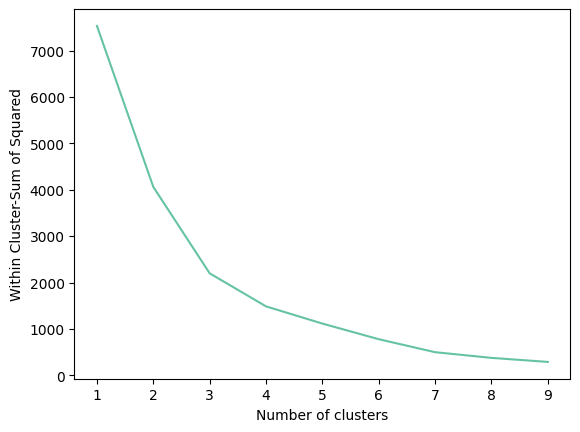

In [110]:
# Elbow method 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(early_train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss) # 배열에 담긴 inertia_ 값 그래프로 그리기
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster-Sum of Squared')
plt.show()

In [111]:
# KMeans 군집화 모델 생성
num_clusters = 3  # 군집 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(early_train_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [112]:
# 군집 결과를 데이터프레임에 추가
early_data['cluster'] = kmeans.labels_
early_data

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
0,초기 이유식,기장미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,19.000000,0.3,0.4,19.799999,0.000000,0.0,0.0,0.3,0.0,0
1,초기 이유식,청경채미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.700000,0.3,2.5,46.299999,51.799999,0.0,0.0,0.3,7.2,1
2,초기 이유식,감자미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,11.800000,0.2,0.5,49.799999,0.000000,0.0,0.0,0.3,2.1,2
3,초기 이유식,고구마미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,12.100000,0.2,1.7,53.099998,1.900000,0.0,0.0,0.2,2.5,2
4,초기 이유식,사과미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,8.800000,0.2,0.5,21.700001,0.300000,0.0,0.0,0.2,0.4,0
5,초기 이유식,애호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.400000,0.2,0.5,55.000000,4.100000,0.0,0.0,0.2,5.2,2
6,초기 이유식,흑미미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,19.900000,0.2,0.3,16.000000,0.000000,0.0,0.0,0.4,0.0,0
7,초기 이유식,단호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.400000,0.2,0.7,54.400002,28.600000,0.0,0.0,0.3,2.8,1
8,초기 이유식,닭고기미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,23.600000,0.2,5.9,28.500000,5.500000,0.0,0.0,0.9,0.2,0
9,초기 이유식,바나나미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,8.800000,0.2,0.4,43.700001,0.700000,0.0,0.0,0.2,0.8,2


In [113]:
# 군집별 특징 알아보기
cluster_data = early_data.copy()
cluster_data = cluster_data.iloc[:,-16:]
cluster_data

cluster0 = early_data[early_data['cluster']==0]
cluster0_mean = cluster0.iloc[:,-16:]
cluster0_mean = cluster0_mean.mean();print(cluster0_mean)
cluster0

calorie         48.344444
carbohydrate     9.877778
protein          1.366667
fat              0.922222
fiber            0.188889
calcium          2.455556
phosphorus      16.277778
iron             0.233333
sodium           1.722222
potassium       27.044445
vitamin_A        1.711111
thiamine         0.000000
riboflavin       0.000000
niacin           0.377778
vitamin_C        0.411111
cluster          0.000000
dtype: float64


,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
0,초기 이유식,기장미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,19.000000,0.3,0.4,19.799999,0.0,0.0,0.0,0.3,0.0,0
4,초기 이유식,사과미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,8.800000,0.2,0.5,21.700001,0.3,0.0,0.0,0.2,0.4,0
6,초기 이유식,흑미미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,19.900000,0.2,0.3,16.000000,0.0,0.0,0.0,0.4,0.0,0
8,초기 이유식,닭고기미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,23.600000,0.2,5.9,28.500000,5.5,0.0,0.0,0.9,0.2,0
10,초기 이유식,배미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,8.000000,0.2,0.6,30.700001,0.0,0.0,0.0,0.2,0.5,0
11,초기 이유식,수박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,10.100000,0.2,0.7,27.500000,3.9,0.0,0.0,0.2,0.9,0
12,초기 이유식,수수미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,17.200001,0.2,0.3,29.200001,0.0,0.0,0.0,0.3,0.0,0
14,초기 이유식,오이미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.000000,0.2,1.0,36.500000,4.5,0.0,0.0,0.2,1.5,0
16,초기 이유식,쇠고기미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,26.900000,0.4,5.8,33.500000,1.2,0.0,0.0,0.7,0.2,0


In [114]:
cluster1 = early_data[early_data['cluster']==1]
cluster1_mean = cluster1.iloc[:,-16:]
cluster1_mean = cluster1_mean.mean();print(cluster1_mean)
cluster1

# vitamin_A, potassium, vitamin_C, phosphorous

calorie         43.000000
carbohydrate     9.333333
protein          1.133333
fat              0.100000
fiber            0.500000
calcium         10.400000
phosphorus      21.033333
iron             0.300000
sodium           1.633333
potassium       52.300001
vitamin_A       33.200000
thiamine         0.000000
riboflavin       0.000000
niacin           0.300000
vitamin_C        8.233333
cluster          1.000000
dtype: float64


,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
1,초기 이유식,청경채미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.7,0.3,2.5,46.299999,51.799999,0.0,0.0,0.3,7.2,1
7,초기 이유식,단호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.4,0.2,0.7,54.400002,28.600000,0.0,0.0,0.3,2.8,1
15,초기 이유식,브로콜리미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,36.0,0.4,1.7,56.200001,19.200001,0.0,0.0,0.3,14.7,1


In [115]:
cluster2 = early_data[early_data['cluster']==2]
cluster2_mean = cluster2.iloc[:,-16:]
cluster2_mean = cluster2_mean.mean();print(cluster2_mean)
cluster2

calorie         45.850000
carbohydrate    10.066667
protein          1.016667
fat              0.083333
fiber            0.383333
calcium          4.550000
phosphorus      12.483333
iron             0.216667
sodium           0.750000
potassium       49.150000
vitamin_A        2.200000
thiamine         0.000000
riboflavin       0.016667
niacin           1.100000
vitamin_C        2.500000
cluster          2.000000
dtype: float64


,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,phosphorus,iron,sodium,potassium,vitamin_A,thiamine,riboflavin,niacin,vitamin_C,cluster
2,초기 이유식,감자미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,11.8,0.2,0.5,49.799999,0.0,0.0,0.0,0.3,2.1,2
3,초기 이유식,고구마미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,12.1,0.2,1.7,53.099998,1.9,0.0,0.0,0.2,2.5,2
5,초기 이유식,애호박미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,13.4,0.2,0.5,55.000000,4.1,0.0,0.0,0.2,5.2,2
9,초기 이유식,바나나미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,8.8,0.2,0.4,43.700001,0.7,0.0,0.0,0.2,0.8,2
13,초기 이유식,양배추미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,12.0,...,11.9,0.2,1.0,45.500000,0.4,0.0,0.0,0.2,4.4,2
17,초기 이유식,완두콩미음,5.0,0.0,0.0,5.0,5.0,5.0,5.0,10.0,...,16.9,0.3,0.4,47.799999,6.1,0.0,0.1,5.5,0.0,2


# 중기 이유식

In [28]:
middle = result[result['category'] == '중기 이유식']
middle

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
1,중기 이유식,닭가슴살고구마죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,중기 이유식,닭가슴살당근죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,중기 이유식,닭가슴살청경채죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,중기 이유식,찹쌀컬리플라워당근죽,5.0,5.0,5.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,중기 이유식,브로콜리당근죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,중기 이유식,두부달걀노른자찜,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,중기 이유식,쇠고기양송이무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,중기 이유식,쇠고기청경채죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,중기 이유식,닭고기브로콜리수프,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
late = result[result['category'] == '후기 이유식']
late

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
0,후기 이유식,찹쌀미음,5.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,후기 이유식,고구마찹쌀진밥,5.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,후기 이유식,멜론감자수프,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,후기 이유식,애호박완두콩무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,후기 이유식,표고버섯무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,후기 이유식,콩나물무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,후기 이유식,검은콩닭죽,5.0,0.0,0.0,5.0,5.0,5.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,후기 이유식,연두부파무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,후기 이유식,고구마야채무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,후기 이유식,가지닭살무른밥,5.0,0.0,0.0,5.0,5.0,5.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
snack = result[result['category'] == '이유기 간식']
snack

,category,food_name,쌀,찹쌀,백미,멥쌀,논벼,백미 국내산,일반형,일품,...,전란,소면,마른것,쌀가루,밀가공식품,밀가루,중력분,카레분말,돔,감성돔
8,이유기 간식,감자바나나요구르트으깸,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,이유기 간식,사과퓨레,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,이유기 간식,당근퓨레,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,이유기 간식,바나나퓨레,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,이유기 간식,오렌지퓨레,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,이유기 간식,과일요구르트범벅,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,이유기 간식,배퓨레,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,이유기 간식,사과배푸딩,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,이유기 간식,고구마사과메시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,이유기 간식,감자야채달걀노른자찜,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
